In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")
    
from preprocess import Preprocessing
from sklearn.model_selection import train_test_split
#some of the analysis I took from https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction and 
#https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

# Data Analysis

before data anaylysis I did preprocessing, where I explained about the data and preprocessing steps, so go read first, Preprocess_data.ipynb

In [2]:
X_train = pd.read_csv('./data/train.csv')
y_train = X_train['price']
X_train.drop(columns=['price'], inplace=True)

In [3]:
X_train.shape

(8557, 13)

# Correlation of features with each other
So we see that there is high correaltion between sq_m and rooms, floors_all and floor, floors_all and year. I guess we even may remove rooms, since there is very high correlation with sq_m </br>

All it can be explained logically: more rooms mostly means more sq_m, older the building is less floors_all(this tendency is in ALmaty, during USSR mostly 5 floored buildings have been built, while now more high buildings)



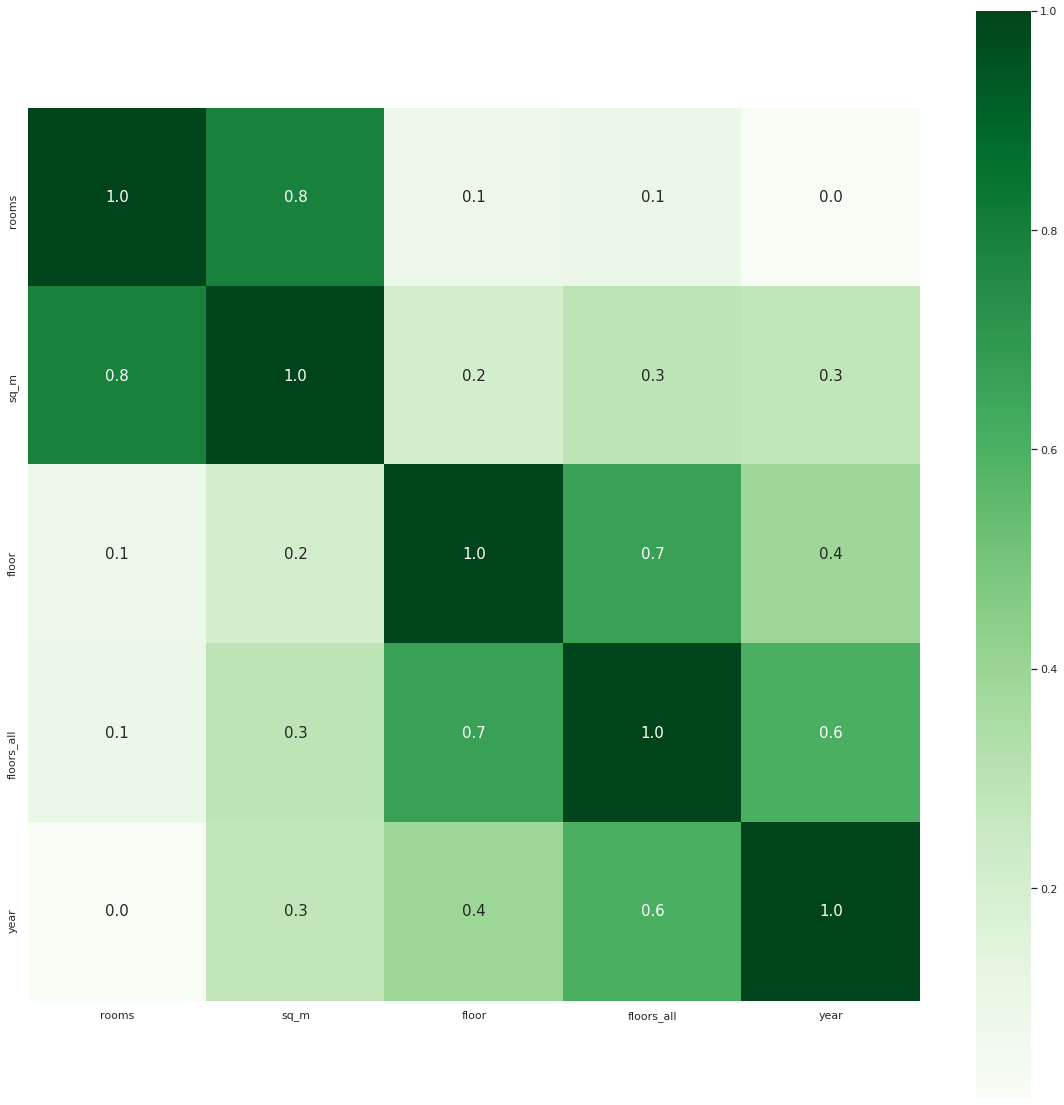

In [8]:
areas = [f'area{i}' for i in range(1, 9)]
cols = [col for col in X_train.columns if col not in areas]
corr = X_train[cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Pearson's Correlation of features with target 

We see high correlation between sq_m and price. So we can say that more sq_m means higher price.

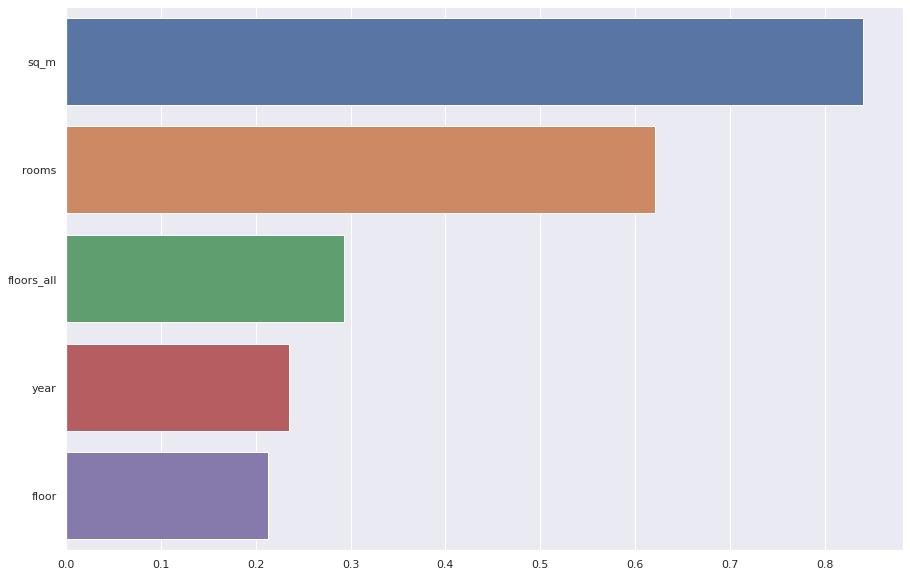

In [9]:
numeric_features = ['rooms', 'sq_m', 'floor', 'floors_all', 'year']
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)


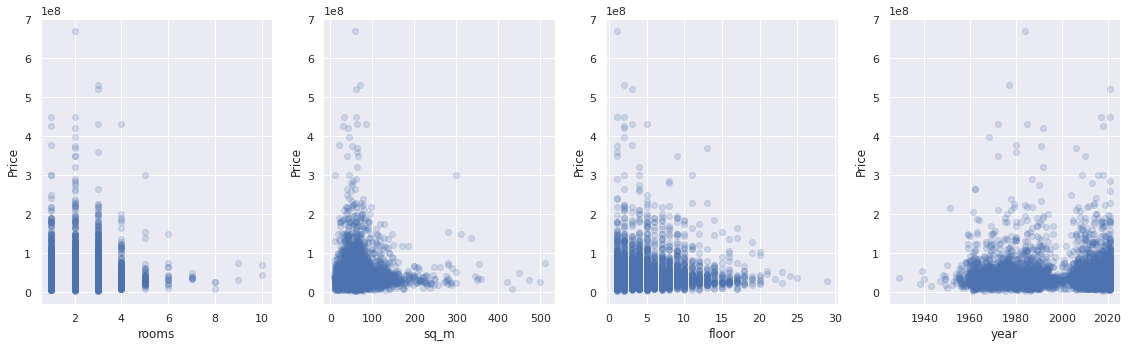

In [6]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=4)
for i, feature in enumerate(["rooms", "sq_m", "floor", "year"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Price")
plt.tight_layout()



From distribution of price variable, we see long right tail, so let's use logarithm to remove them

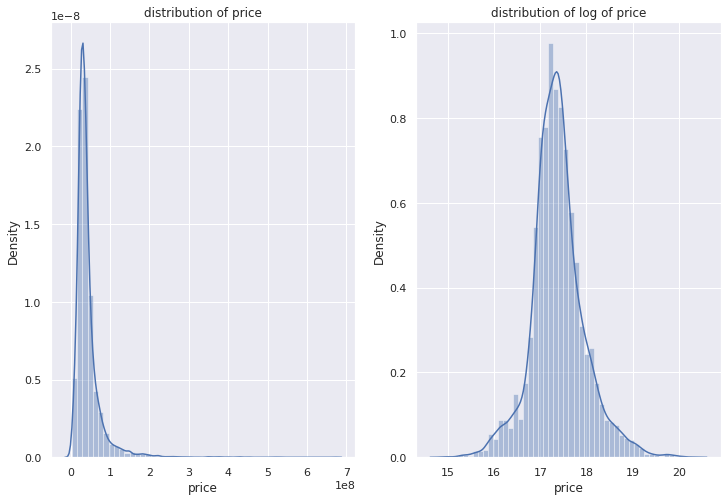

In [14]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(y_train, ax=ax[0]).set(title='distribution of price')

sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(np.log(y_train), ax=ax[1]).set(title='distribution of log of price')
fig.show()

# Simple Linear model with L2 Regularization

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
import pandas as pd
target_scaler = pickle.load(open('./utils/target_scaler.pkl','rb'))


alphas = np.logspace(-2, 4, 50)

X_train = pd.read_csv('./data/train_norm.csv')
X_val = pd.read_csv('./data/val_norm.csv')
X_test = pd.read_csv('./data/test_norm.csv')

cols = [col for col in X_train.columns if col != 'rooms']#remove rooms
X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

y_train = X_train['price']
X_train.drop(columns=['price'], inplace=True)
y_val = X_val['price']
X_val.drop(columns=['price'], inplace=True)
y_test = X_test['price']
X_test.drop(columns=['price'], inplace=True)

best_mean_square = float('inf')
best_alpha = 0
rmse_list = []
rmse_train_list = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.to_numpy()[:,None]), target_scaler.inverse_transform(y_pred[:,None]), squared=False)
    rmse_train = mean_squared_error(target_scaler.inverse_transform(y_train.to_numpy()[:,None]), target_scaler.inverse_transform(y_train_pred[:,None]), squared=False)
    print(f'alpha = {alpha:.3f}, val rmse: {rmse:.2f}, train_mse = {rmse_train:.2f}')
    rmse_list.append(rmse)
    rmse_train_list.append(rmse_train)
    if rmse < best_mean_square:
        best_alpha = alpha
        best_mean_square = rmse
 

alpha = 0.010, val rmse: 30629563.37, train_mse = 17940478.17
alpha = 0.013, val rmse: 30629561.57, train_mse = 17940478.17
alpha = 0.018, val rmse: 30629559.19, train_mse = 17940478.17
alpha = 0.023, val rmse: 30629556.02, train_mse = 17940478.17
alpha = 0.031, val rmse: 30629551.83, train_mse = 17940478.17
alpha = 0.041, val rmse: 30629546.27, train_mse = 17940478.17
alpha = 0.054, val rmse: 30629538.90, train_mse = 17940478.18
alpha = 0.072, val rmse: 30629529.14, train_mse = 17940478.19
alpha = 0.095, val rmse: 30629516.19, train_mse = 17940478.22
alpha = 0.126, val rmse: 30629499.05, train_mse = 17940478.25
alpha = 0.168, val rmse: 30629476.33, train_mse = 17940478.32
alpha = 0.222, val rmse: 30629446.23, train_mse = 17940478.43
alpha = 0.295, val rmse: 30629406.37, train_mse = 17940478.63
alpha = 0.391, val rmse: 30629353.61, train_mse = 17940478.99
alpha = 0.518, val rmse: 30629283.79, train_mse = 17940479.60
alpha = 0.687, val rmse: 30629191.46, train_mse = 17940480.67
alpha = 

In [20]:
print(f'best_alpha: {best_alpha}, with val rmse = {best_mean_square:.2f}')

best_alpha: 193.06977288832496, with val rmse = 30587542.92


Text(0, 0.5, 'Rmse')

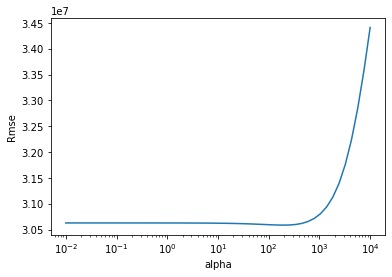

In [21]:
import matplotlib.pyplot as plt
plt.plot(alphas, rmse_list)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Rmse")

In [22]:
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
       
print("Train RMSE = %.2f" % mean_squared_error(target_scaler.inverse_transform(y_train.to_numpy()[:,None]), target_scaler.inverse_transform(y_train_pred[:,None]), squared=False))
print("Val RMSE = %.2f" % mean_squared_error(target_scaler.inverse_transform(y_val.to_numpy()[:,None]), target_scaler.inverse_transform(y_val_pred[:,None]), squared=False))
print("Test RMSE = %.2f" % mean_squared_error(target_scaler.inverse_transform(y_test.to_numpy()[:,None]), target_scaler.inverse_transform(y_pred[:,None]), squared=False))

Train RMSE = 18001833.13
Val RMSE = 30587542.92
Test RMSE = 16997231.19


In [18]:
from sklearn import metrics


r2_train = metrics.r2_score(target_scaler.inverse_transform(y_train.to_numpy()[:,None]), target_scaler.inverse_transform(y_train_pred[:,None]))
r2_val = metrics.r2_score(target_scaler.inverse_transform(y_val.to_numpy()[:,None]), target_scaler.inverse_transform(y_val_pred[:,None]))
r2_test = metrics.r2_score(target_scaler.inverse_transform(y_test.to_numpy()[:,None]), target_scaler.inverse_transform(y_pred[:,None]))



print(f'R^2 train: {r2_train:.3f}')
print(f'R^2 val: {r2_val:.3f}')
print(f'R^2 test: {r2_test:.3f}')

R^2 train: 0.749
R^2 val: 0.486
R^2 test: 0.741


In [29]:
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_val = 1 - (1-r2_val)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R^2 train: {adj_r2_train:.3f}')
print(f'Adjusted R^2 train: {adj_r2_val:.3f}')
print(f'Adjusted R^2 train: {adj_r2_test:.3f}')

Adjusted R^2 train: 0.748
Adjusted R^2 train: 0.483
Adjusted R^2 train: 0.738


In [23]:
#pickle.dump(model, open('./utils/ridge_model.pkl', 'wb'))

# Simple XGBoost

In [30]:
X_train

,sq_m,floor,floors_all,year,area1,area2,area3,area4,area5,area6,area7,area8
0,0.462088,4.636016,3.119102,0.499968,0,0,0,1,0,0,0,0
1,0.026690,-0.124835,-0.358382,0.548426,0,0,0,0,1,0,0,0
2,-0.517557,0.767824,1.264444,0.887637,1,0,0,0,0,0,0,0
3,-0.844105,-0.719942,-0.822047,-1.632214,0,0,0,1,0,0,0,0
4,3.999695,-0.422389,0.337115,0.548426,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8552,-0.544769,0.767824,0.337115,0.984554,1,0,0,0,0,0,0,0
8553,0.092000,1.065378,1.959940,0.451509,0,0,0,1,0,0,0,0
8554,0.053903,0.470271,0.337115,0.451509,0,0,0,0,0,1,0,0
8555,-0.299858,-1.017495,-1.517544,-1.777590,1,0,0,0,0,0,0,0
